# Download MNIST Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

/home/iadel/digits_recognition/digits_recognition/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/iadel/.cache/kagglehub/datasets/oddrationale/mnist-in-csv/versions/2


In [2]:
import pandas as pd

data_train = f"{path}/mnist_train.csv"
data_test = f"{path}/mnist_test.csv"

df_train = pd.read_csv(data_train)
df_test = pd.read_csv(data_test)
print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)

Training data shape: (60000, 785)
Testing data shape: (10000, 785)


# Visualize the Data

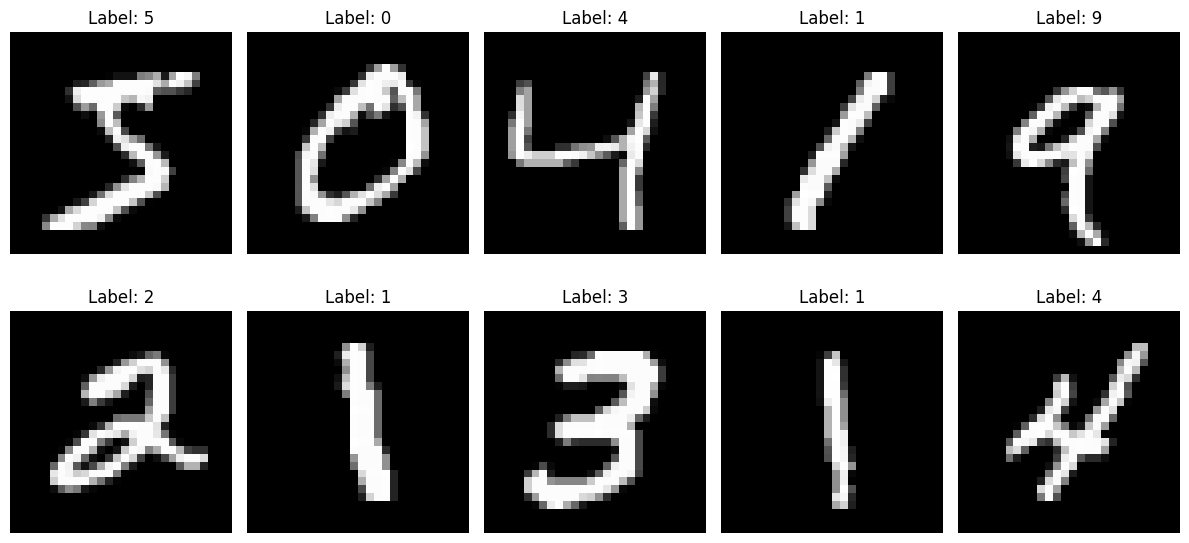

In [8]:
# Visualize the Data
import matplotlib.pyplot as plt

# Plot some samples from the training set
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(df_train.iloc[i, 1:].values.reshape(28, 28), cmap="gray")
    plt.title(f"Label: {df_train.iloc[i, 0]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [9]:
X = df_train.iloc[:, 1:].values
y = df_train.iloc[:, 0].values

# Training Phase

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training Phase
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X, y)

# Evaluation Phase
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test accuracy: 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Saving the Model

In [15]:
import os
import pickle

models_dir = os.path.join("..", "models")
os.makedirs(models_dir, exist_ok=True)

# Saving the Model
model_path = os.path.join(models_dir, "random_forest_mnist_model.pkl")
with open(model_path, "wb") as f:
    pickle.dump(clf, f)
print(f"Model saved to {model_path}")


Model saved to ../models/random_forest_mnist_model.pkl


# Test the saved model

In [ ]:
with open(model_path, "rb") as f:
    rf = pickle.load(f)

y_test_pred = rf.predict(X_test)
print("Test accuracy (loaded model):", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test accuracy (loaded model): 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Tracking with ML Flow

In [1]:
import mlflow

mlflow.set_experiment("MNIST EXPERIMENT")

/home/iadel/digits_recognition/digits_recognition/.venv/lib/python3.13/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/29 14:45:22 INFO mlflow.tracking.fluent: Experiment with name 'MNIST EXPERIMENT' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///home/iadel/digits_recognition/digits_recognition/notebooks/mlruns/608815202941434812', creation_time=1764420322521, experiment_id='608815202941434812', last_update_time=1764420322521, lifecycle_stage='active', name='MNIST EXPERIMENT', tags={}>

In [2]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

data_train = f"{path}/mnist_train.csv"
data_test = f"{path}/mnist_test.csv"

df_train = pd.read_csv(data_train)
df_test = pd.read_csv(data_test)
print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)

/home/iadel/digits_recognition/digits_recognition/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/iadel/.cache/kagglehub/datasets/oddrationale/mnist-in-csv/versions/2
Training data shape: (60000, 785)
Testing data shape: (10000, 785)


In [4]:
from sklearn.ensemble import RandomForestClassifier

mlflow.sklearn.autolog()

x_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_train, y_train)

2025/11/29 14:47:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9b42edd780604ac19fac4dafc21608f2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
from sklearn.metrics import accuracy_score, classification_report

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9669


In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

F1 Score: 0.9668734840124072
Precision: 0.9669142502758217
Recall: 0.9669


In [ ]:
# Testing Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

lr = DecisionTreeClassifier(max_depth=10, random_state=42)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_train)
lr_accuracy = accuracy_score(y_train, lr_pred)
print("Logistic Regression Train accuracy:", lr_accuracy)

lr_accuracy_test = accuracy_score(y_test, lr.predict(X_test))
print("Logistic Regression Test accuracy:", lr_accuracy_test)
f1_lr = f1_score(y_test, lr.predict(X_test), average='weighted')
precision_lr = precision_score(y_test, lr.predict(X_test), average='weighted')
recall_lr = recall_score(y_test, lr.predict(X_test), average='weighted')
print(f"Logistic Regression F1 Score: {f1_lr}")

2025/11/29 15:34:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'af139328acf641c7a73975d3b58f7825', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Logistic Regression Train accuracy: 0.8995166666666666
Logistic Regression Test accuracy: 0.8662
Logistic Regression F1 Score: 0.866231140344577


# SVM Classifier

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x_train = df_train.iloc[:1000, 1:].values
y_train = df_train.iloc[:1000, 0].values

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_train)

svm_accuracy = accuracy_score(y_train, svm_pred)
print("SVM Train accuracy:", svm_accuracy)

SVM Train accuracy: 0.982


# logistic reggression classify


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train = df_train.iloc[:1000, 1:].values
y_train = df_train.iloc[:1000, 0].values

svm = LogisticRegression(random_state=42)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_train)

svm_accuracy = accuracy_score(y_train, svm_pred)
print("LR Train accuracy:", svm_accuracy)

LR Train accuracy: 1.0
